<a href="https://colab.research.google.com/github/othinAbbey/Prediction-of-Product-Sales/blob/main/Onyango_Abbey_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IMPORTS
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
## Setting figures to timeseries-friendly
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['figure.facecolor'] = 'white'
sns.set_context("talk", font_scale=0.9)
# set random seed
SEED = 321
np.random.seed(SEED)
#display more columns
pd.set_option('display.max_columns',50)

In [ ]:
#loading files
# Specify the path to your files (change this to your actual path)   ****stackoverflow.com
path = r'/content/drive/MyDrive/Data'

# Get a list of all CSV files in the specified path
all_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store DataFrames
dfs = []

# Read each CSV file and append its DataFrame to the list
for filename in all_files:
    df = pd.read_csv(filename,)
    dfs.append(df)

# Concatenate all DataFrames into one big DataFrame
big_df = pd.concat(dfs, ignore_index=True)

# Now 'big_df' contains all data from the CSV files
big_df.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
1,1319931,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2,1324743,01/01/2001 01:00:00 PM,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
3,1310717,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
4,1318099,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020


In [ ]:
big_df

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
1,1319931,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2,1324743,01/01/2001 01:00:00 PM,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
3,1310717,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
4,1318099,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020
...,...,...,...,...,...,...,...,...,...,...,...,...
7713104,12581450,12/31/2021 12:45:00 PM,CONCEALED CARRY LICENSE VIOLATION,ARMED WHILE UNDER THE INFLUENCE,STREET,True,False,614,6.0,21.0,41.738569,-87.663137
7713105,12581388,12/31/2021 12:45:00 PM,ASSAULT,AGGRAVATED - KNIFE / CUTTING INSTRUMENT,APARTMENT,False,False,221,2.0,4.0,41.812412,-87.604432
7713106,12581977,12/31/2021 12:46:00 PM,ASSAULT,AGGRAVATED - KNIFE / CUTTING INSTRUMENT,COMMERCIAL / BUSINESS OFFICE,False,False,623,6.0,17.0,41.750934,-87.626288
7713107,12582396,12/31/2021 12:49:00 AM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,False,False,611,6.0,18.0,41.756418,-87.674522


In [ ]:
#checking info
big_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7713109 entries, 0 to 7713108
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 603.2+ MB


In [ ]:
#changing date column to datetime
big_df['Date'] = pd.to_datetime(big_df['Date'])
big_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7713109 entries, 0 to 7713108
Data columns (total 12 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  datetime64[ns]
 2   Primary Type          object        
 3   Description           object        
 4   Location Description  object        
 5   Arrest                bool          
 6   Domestic              bool          
 7   Beat                  int64         
 8   District              float64       
 9   Ward                  float64       
 10  Latitude              float64       
 11  Longitude             float64       
dtypes: bool(2), datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 603.2+ MB


In [ ]:
#setting the index to date
big_df.set_index('Date',inplace=True)
big_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7713109 entries, 2001-01-01 01:00:00 to 2021-12-31 00:55:00
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Primary Type          object 
 2   Description           object 
 3   Location Description  object 
 4   Arrest                bool   
 5   Domestic              bool   
 6   Beat                  int64  
 7   District              float64
 8   Ward                  float64
 9   Latitude              float64
 10  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(3)
memory usage: 603.2+ MB


In [ ]:
#saving a copy
df_conv = big_df.copy()
df_conv

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
2001-01-01 13:00:00,1319931,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2001-01-01 13:00:00,1324743,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
2001-01-01 01:00:00,1310717,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
2001-01-01 01:00:00,1318099,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 12:45:00,12581450,CONCEALED CARRY LICENSE VIOLATION,ARMED WHILE UNDER THE INFLUENCE,STREET,True,False,614,6.0,21.0,41.738569,-87.663137
2021-12-31 12:45:00,12581388,ASSAULT,AGGRAVATED - KNIFE / CUTTING INSTRUMENT,APARTMENT,False,False,221,2.0,4.0,41.812412,-87.604432
2021-12-31 12:46:00,12581977,ASSAULT,AGGRAVATED - KNIFE / CUTTING INSTRUMENT,COMMERCIAL / BUSINESS OFFICE,False,False,623,6.0,17.0,41.750934,-87.626288


In [ ]:
#understanding the description column
df_conv['Description'].nunique()

547

Too many unique values. this would create too many columns in our dataframe. lets try Primary Type

In [ ]:
df_conv['Primary Type'].nunique()

36

this is better. lets use this to under the nature of crime

In [ ]:
#lets plot a crimes count plot for starters
crimes_counts = df_conv['Primary Type'].value_counts(normalize=True)
crimes_counts = df_conv['Primary Type'].value_counts().to_frame('Total # of Crimes')
crimes_counts

,Total # of Crimes
Primary Type,
THEFT,1626992
BATTERY,1410889
CRIMINAL DAMAGE,878914
NARCOTICS,746155
ASSAULT,501103
OTHER OFFENSE,479174
BURGLARY,422246
MOTOR VEHICLE THEFT,366586
DECEPTIVE PRACTICE,340958


In [ ]:
#visual with a style bar
crimes_counts.style.bar('Total # of Crimes')

,Total # of Crimes
Primary Type,
THEFT,1626992
BATTERY,1410889
CRIMINAL DAMAGE,878914
NARCOTICS,746155
ASSAULT,501103
OTHER OFFENSE,479174
BURGLARY,422246
MOTOR VEHICLE THEFT,366586
DECEPTIVE PRACTICE,340958


We can see that:
1. Theft
2. Battery and
3. Criminal damage

top the list of crimes




Lets prepare a dataframe of crimes against time so as to answer the statkeholder questions using groupby and .size()

In [ ]:
#using .size() on Primary type of crime
df_conv.groupby('Primary Type').size().head()

Primary Type
ARSON                                  13121
ASSAULT                               501103
BATTERY                              1410889
BURGLARY                              422246
CONCEALED CARRY LICENSE VIOLATION       1019
dtype: int64

In [ ]:
#making empty dictionary of crimes
CRIMES = {}

In [ ]:
#making a list of our crimes
crimes_list = df_conv['Primary Type'].unique()
crimes_list

array(['BATTERY', 'GAMBLING', 'CRIMINAL DAMAGE',
       'OFFENSE INVOLVING CHILDREN', 'THEFT', 'ASSAULT', 'NARCOTICS',
       'CRIM SEXUAL ASSAULT', 'DECEPTIVE PRACTICE', 'WEAPONS VIOLATION',
       'OTHER OFFENSE', 'MOTOR VEHICLE THEFT', 'SEX OFFENSE', 'BURGLARY',
       'PUBLIC PEACE VIOLATION', 'LIQUOR LAW VIOLATION', 'ROBBERY',
       'CRIMINAL TRESPASS', 'INTERFERENCE WITH PUBLIC OFFICER',
       'HOMICIDE', 'KIDNAPPING', 'PROSTITUTION', 'STALKING',
       'INTIMIDATION', 'CRIMINAL SEXUAL ASSAULT', 'ARSON', 'RITUALISM',
       'DOMESTIC VIOLENCE', 'OBSCENITY', 'OTHER NARCOTIC VIOLATION',
       'PUBLIC INDECENCY', 'CONCEALED CARRY LICENSE VIOLATION',
       'NON-CRIMINAL', 'HUMAN TRAFFICKING',
       'NON-CRIMINAL (SUBJECT SPECIFIED)', 'NON - CRIMINAL'], dtype=object)

In [ ]:
#creating a forloop which will fill our CRIMES dictionary with resampled DFs of crimes according to size
CRIMES = {}
# 3. Loop through the list of crimes
for crime in crimes_list:
    # I. Save a temp df of just the rows that match the crime
   temp = df_conv.loc[ df_conv['Primary Type']==crime].copy()
    # II. Resample the temp DataFrame as Daily data (crime counts)
    # and keep ONLY the .size()
   temp_res = temp.resample("D").size()
   #III. Save the temporary DataFrame in the dictionary,
   #using the crime description as the key.
   CRIMES[crime] = temp_res.copy()
CRIMES.keys()

dict_keys(['BATTERY', 'GAMBLING', 'CRIMINAL DAMAGE', 'OFFENSE INVOLVING CHILDREN', 'THEFT', 'ASSAULT', 'NARCOTICS', 'CRIM SEXUAL ASSAULT', 'DECEPTIVE PRACTICE', 'WEAPONS VIOLATION', 'OTHER OFFENSE', 'MOTOR VEHICLE THEFT', 'SEX OFFENSE', 'BURGLARY', 'PUBLIC PEACE VIOLATION', 'LIQUOR LAW VIOLATION', 'ROBBERY', 'CRIMINAL TRESPASS', 'INTERFERENCE WITH PUBLIC OFFICER', 'HOMICIDE', 'KIDNAPPING', 'PROSTITUTION', 'STALKING', 'INTIMIDATION', 'CRIMINAL SEXUAL ASSAULT', 'ARSON', 'RITUALISM', 'DOMESTIC VIOLENCE', 'OBSCENITY', 'OTHER NARCOTIC VIOLATION', 'PUBLIC INDECENCY', 'CONCEALED CARRY LICENSE VIOLATION', 'NON-CRIMINAL', 'HUMAN TRAFFICKING', 'NON-CRIMINAL (SUBJECT SPECIFIED)', 'NON - CRIMINAL'])

In [ ]:
#converting dictionary to dataframe
crimes_df = pd.DataFrame(CRIMES)
crimes_df

,BATTERY,GAMBLING,CRIMINAL DAMAGE,OFFENSE INVOLVING CHILDREN,THEFT,ASSAULT,NARCOTICS,CRIM SEXUAL ASSAULT,DECEPTIVE PRACTICE,WEAPONS VIOLATION,OTHER OFFENSE,MOTOR VEHICLE THEFT,SEX OFFENSE,BURGLARY,PUBLIC PEACE VIOLATION,LIQUOR LAW VIOLATION,ROBBERY,CRIMINAL TRESPASS,INTERFERENCE WITH PUBLIC OFFICER,HOMICIDE,KIDNAPPING,PROSTITUTION,STALKING,INTIMIDATION,CRIMINAL SEXUAL ASSAULT,ARSON,RITUALISM,DOMESTIC VIOLENCE,OBSCENITY,OTHER NARCOTIC VIOLATION,PUBLIC INDECENCY,CONCEALED CARRY LICENSE VIOLATION,NON-CRIMINAL,HUMAN TRAFFICKING,NON-CRIMINAL (SUBJECT SPECIFIED),NON - CRIMINAL
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-01-01,296,2.0,233,100,412,70,97,38.0,94,32,167,60,65,66,5,3,41,29,1.0,2,2.0,5.0,1,1.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-02,143,1.0,118,4,221,66,175,2.0,78,9,101,65,4,68,2,2,35,35,1.0,0,1.0,11.0,0,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-03,165,0.0,136,3,226,79,133,7.0,49,7,96,72,5,57,7,2,51,35,0.0,0,3.0,16.0,1,0.0,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-04,173,2.0,133,5,243,57,142,2.0,42,9,96,87,1,55,3,4,55,29,3.0,2,2.0,19.0,0,1.0,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-05,178,0.0,142,9,265,68,185,6.0,53,6,90,86,2,55,5,8,55,29,2.0,1,3.0,16.0,0,0.0,0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,76,NaN,64,4,147,47,9,NaN,40,12,33,77,2,17,1,1,27,20,1.0,0,0.0,NaN,1,0.0,4,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2022-12-28,102,NaN,78,3,112,44,12,NaN,38,17,38,103,0,23,1,0,28,12,0.0,1,0.0,NaN,1,0.0,4,0.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2022-12-29,97,NaN,95,3,137,38,15,NaN,38,11,37,95,3,29,2,0,28,12,1.0,2,1.0,NaN,1,1.0,1,0.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


- Topic 6) What cycles (seasonality) can you find in this data?
-- Make sure to select the data of interest and that it is resampled to the frequency you want. (See the "Suggested data to check for seasons" list at the bottom of this topic for suggestions) .
-- Use statsmodels.tsa.seasonal.seasonal_decompose() to decompose the time series.
-- - Note: seasonal_decompose cannot read data resampled as minutes or smaller, and if you try seconds, you will crash your computer. Keep your resampling at hours or more.

- Show and describe each cycle you can find.
-- (Hint: If your seasonal results are too dense to read, try zooming in to look at just one year or one month and try different levels of resampling).
-- Answer the question: How long is a cycle?
-- Answer the question: What is the magnitude of the cycle? (Compare min and max).

- Suggested data to check for seasons:
-- Total Crime (Daily)
-- Total Crime (Weekly)
-- Total Crime (Monthly)
-- Select a Primary Type of interest to you (Daily)
-- Select a Primary Type of interest to you (Weekly)
-- Select a Primary Type of interest to you (Monthly)



In [ ]:
#lets select a list of the top 5 crimes from the crimes list above
crimes = ['THEFT', 'BATTERY', 'CRIMINAL DAMAGE','NARCOTICS', 'ASSAULT']
crimes_ts = crimes_df[crimes].copy()
crimes_ts.head()

,THEFT,BATTERY,CRIMINAL DAMAGE,NARCOTICS,ASSAULT
Date,,,,,
2001-01-01,412,296,233,97,70
2001-01-02,221,143,118,175,66
2001-01-03,226,165,136,133,79
2001-01-04,243,173,133,142,57
2001-01-05,265,178,142,185,68


In [ ]:
#Checking for null values
crimes_ts.isna().sum()

THEFT              0
BATTERY            0
CRIMINAL DAMAGE    0
NARCOTICS          0
ASSAULT            0
dtype: int64

- There's no null values to fill

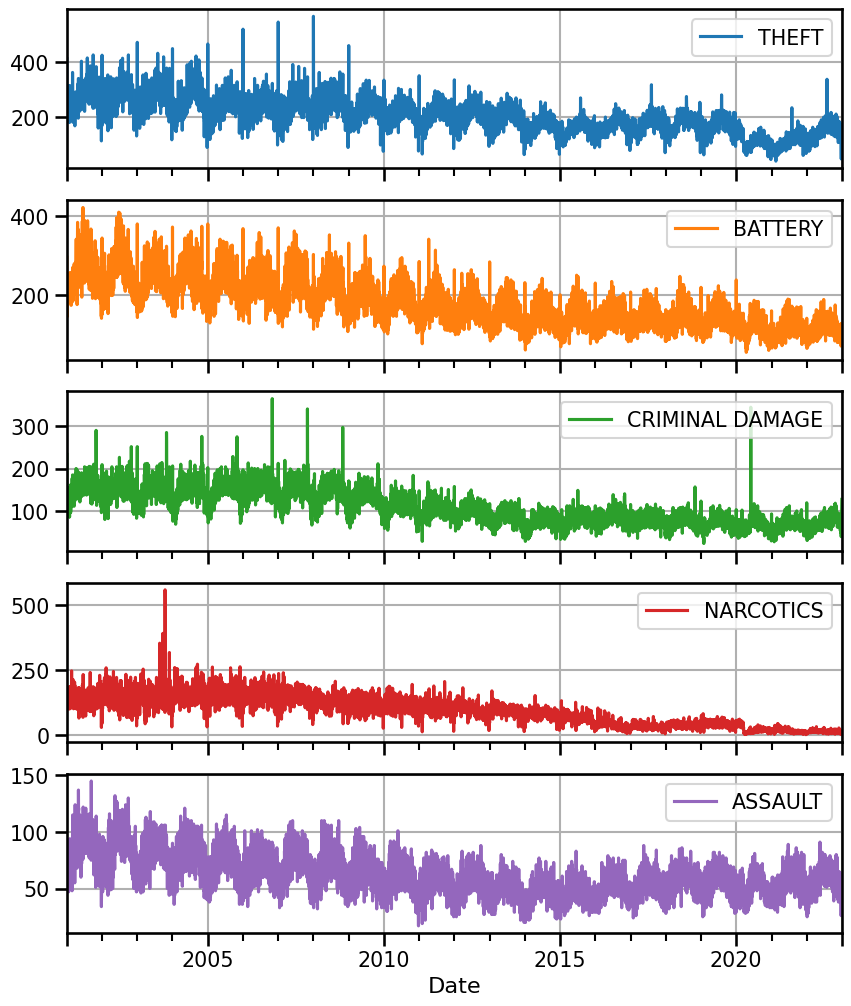

In [ ]:
#checking for seasonality
crimes_ts.plot(subplots=True,figsize=(10,12),grid=True);

Only narcotics doesn't seem to have a seasonal trend.

lets try to focus in on a few years

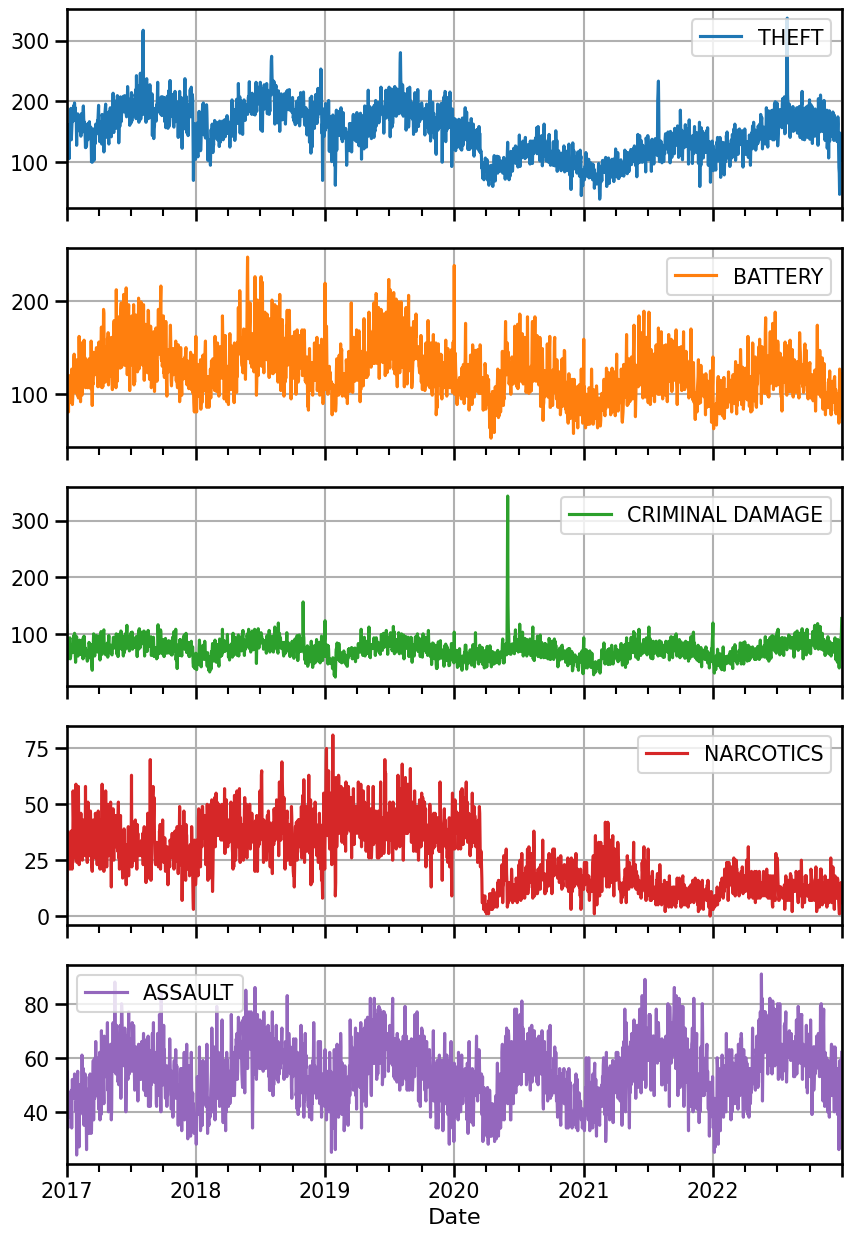

In [ ]:
plot_ts = crimes_ts.loc['2017':'2022']
plot_ts.plot(grid=True,subplots=True,figsize=(10,15));

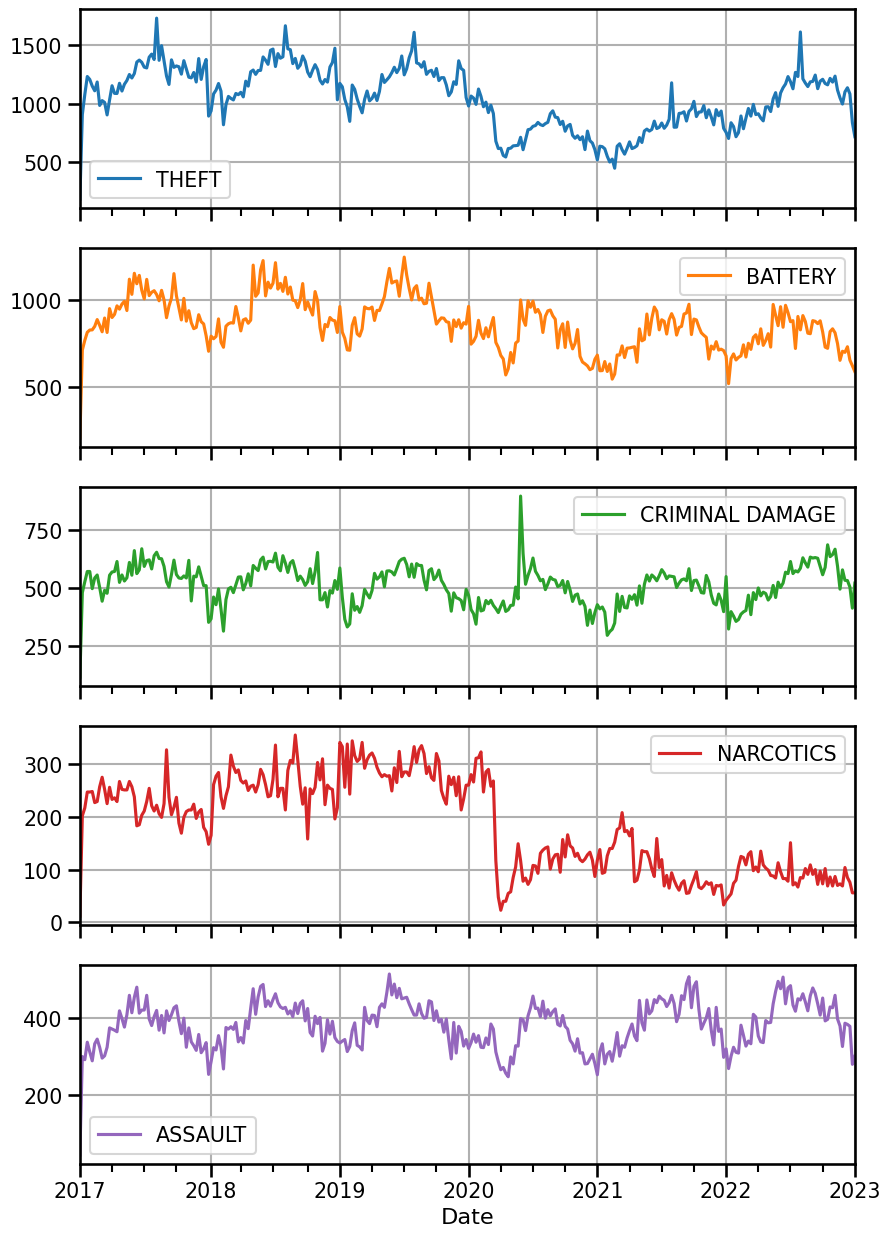

In [ ]:
plot_df_W = plot_ts.resample('W').sum()
plot_df_W.plot(grid=True,subplots=True,figsize=(10,15));

In [ ]:
# import the statsmodels time series analysis api module
import statsmodels.tsa.api as tsa
tsa

<module 'statsmodels.tsa.api' from '/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/api.py'>

<Axes: title={'center': 'THEFT'}, xlabel='Date'>

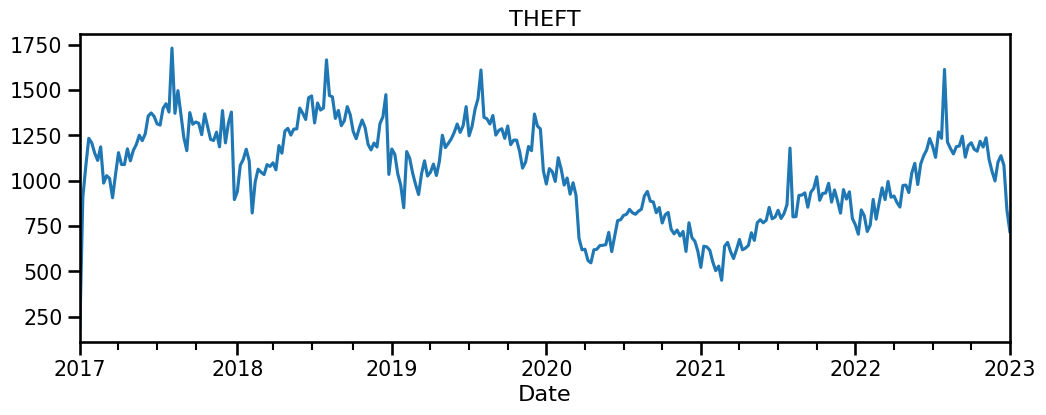

In [ ]:
crime_type = 'THEFT'
ts = plot_df_W[crime_type]
ts.plot(title=crime_type)

In [ ]:
#decomposing time series
decomp = tsa.seasonal_decompose(ts)
decomp

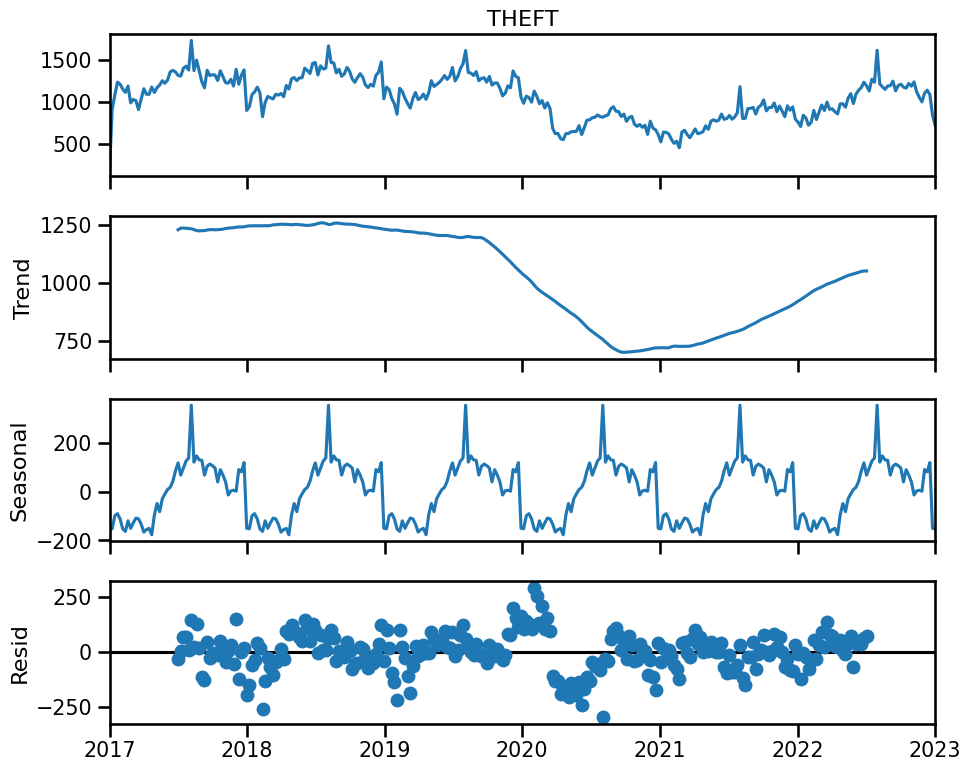

In [ ]:
#plotting our decomp function
fig = decomp.plot()
fig.set_size_inches(10,8)
fig.tight_layout()

In [ ]:
#getting seasonal component
seasonal = decomp.seasonal

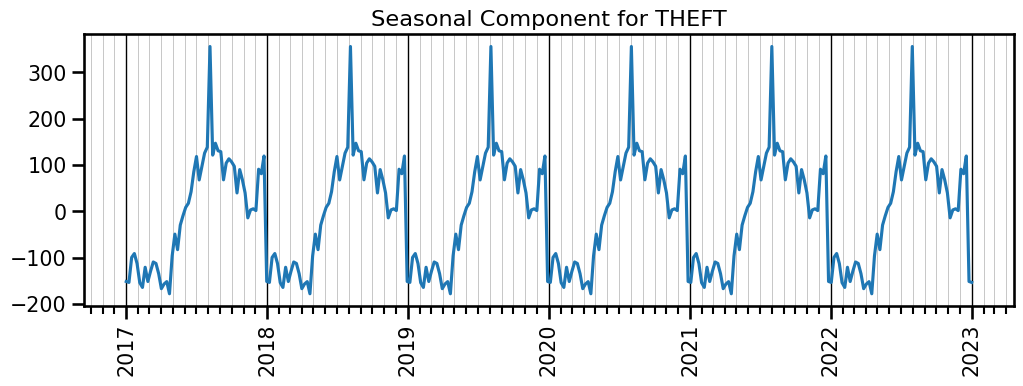

In [ ]:
import matplotlib.dates as mdates
minor_loc = mdates.MonthLocator()
fig, ax = plt.subplots()
ax.plot(seasonal)
ax.set(title=f'Seasonal Component for {crime_type}');
ax.xaxis.set_minor_locator(minor_loc)
ax.grid(which='major', axis='x',lw=1, color='k')
ax.grid(which='minor',axis='x',lw=0.5)
fig.autofmt_xdate(rotation=90, ha='center')

In [ ]:
#importing peaks and props from scipy
from scipy.signal import find_peaks
peaks, props = find_peaks(seasonal, height=seasonal.max())

In [ ]:
#finding peak dates of the cycle
peak_dates = seasonal.index[peaks]
peak_dates

DatetimeIndex(['2017-08-06', '2018-08-05', '2019-08-04', '2020-08-02',
               '2021-08-01', '2022-07-31'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [ ]:
#finding length of cycle
period = peak_dates[1] - peak_dates[0]
period

Timedelta('364 days 00:00:00')

Each cycle is 364days

In [ ]:
import matplotlib.dates as mdates
def plot_seasonal(seasonal):
    minor_loc = mdates.MonthLocator()
    fig, ax = plt.subplots()
    ax.plot(seasonal)
    ax.set(title=f'Seasonal Component for {crime_type}');
    ax.xaxis.set_minor_locator(minor_loc)
    ax.grid(which='major', axis='x',lw=1, color='k')
    ax.grid(which='minor',axis='x',lw=0.5)
    fig.autofmt_xdate(rotation=90, ha='center')

    return fig, ax

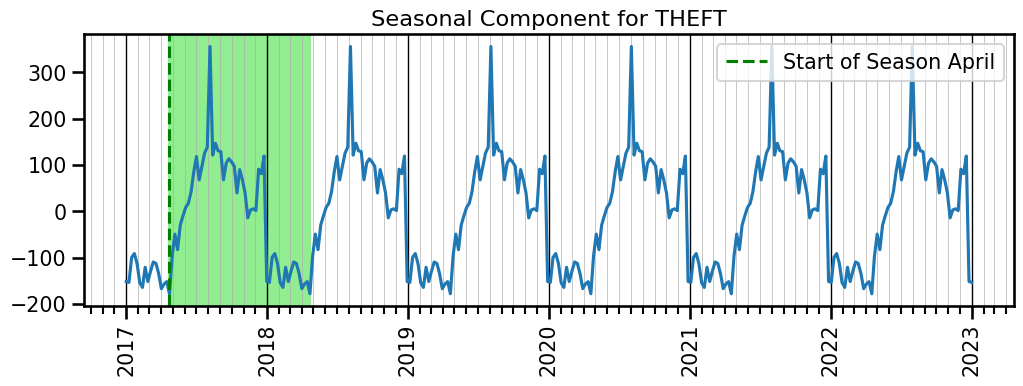

In [ ]:
fig, ax = plot_seasonal(seasonal)
season_start = seasonal.idxmin()
ax.axvspan( season_start, season_start +period, color='lightgreen')
ax.axvline(season_start, color='green', ls='--',
           label=f"Start of Season {season_start.strftime('%B')}")
ax.legend();

In [ ]:
seasonal.max() - seasonal.min()

533.8230769230769

- Topic 4) Comparing Months:
-- Answer the question: What months have the most crime? What months have the least?
- Answer the question: Are there any individual crimes that do not follow this pattern? If so, which crimes?



In [ ]:
## Extracting the Month and Month name
big_df['Month'] = big_df.index.month
big_df['MonthName'] = big_df.index.month_name()
big_df.head(3)

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Month,MonthName
Date,,,,,,,,,,,,,
2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185,1,January
2001-01-01 13:00:00,1319931,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841,1,January
2001-01-01 13:00:00,1324743,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970,1,January


In [ ]:
# saving lookup for number vs name
unique_months = big_df.drop_duplicates(subset=['Month']).sort_values('Month')
month_lookup =dict(zip(unique_months['Month'],unique_months['MonthName']))
month_lookup

{1: 'January',
 2: 'February',
 3: 'March',
 4: 'April',
 5: 'May',
 6: 'June',
 7: 'July',
 8: 'August',
 9: 'September',
 10: 'October',
 11: 'November',
 12: 'December'}

<ipython-input-36-369e3b055195>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


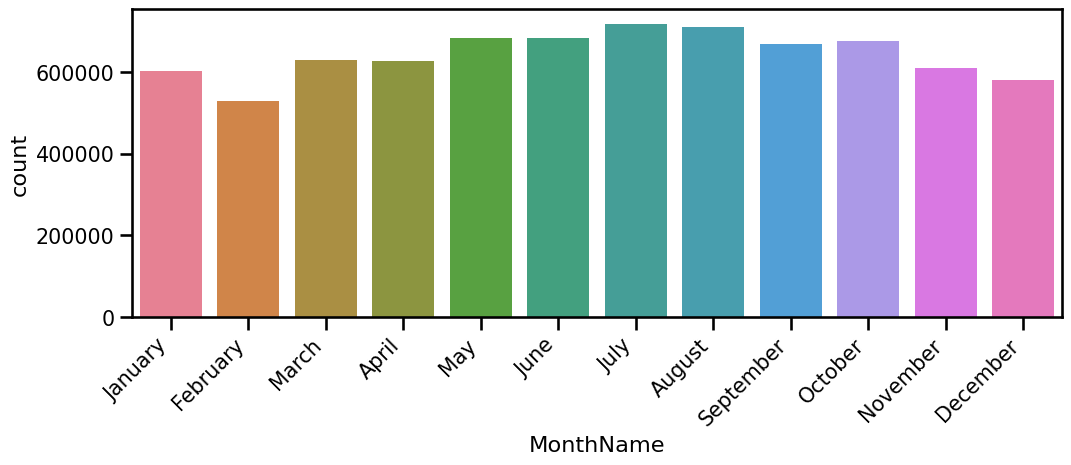

In [ ]:
#plotting months and level of crime
ax = sns.countplot(data=big_df, x='MonthName',order=month_lookup.values(),hue='MonthName');
# Rotate xtick labels and align the text to the bar
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

July and August are the months with the most number of crimes while February has the least

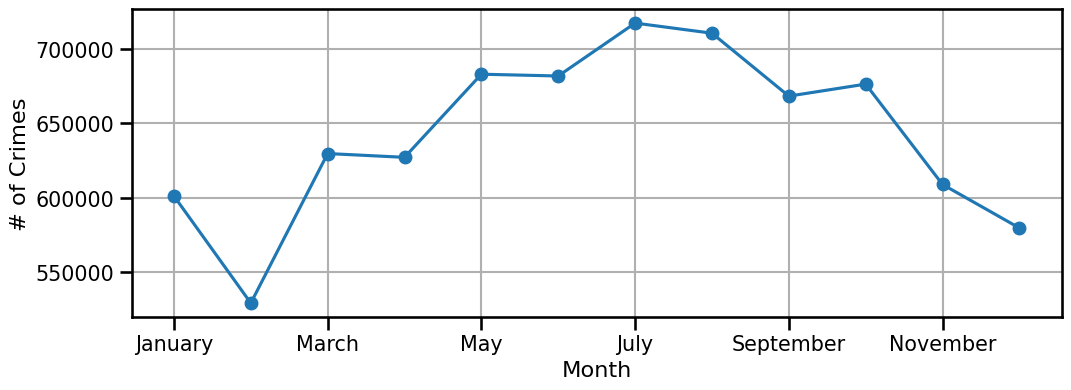

In [ ]:
## save month counts
month_counts = big_df['MonthName'].value_counts()[month_lookup.values()]
# year_counts = df.groupby("Year").size()
ax = month_counts.plot(style='o-',grid=True,
                       ylabel='# of Crimes',
                       xlabel='Month');

In [ ]:
crimes_month = big_df.groupby('Primary Type')['MonthName'].value_counts()
crimes_month

Primary Type       MonthName
ARSON              July         1350
                   June         1236
                   May          1230
                   August       1182
                   September    1131
                                ... 
WEAPONS VIOLATION  March        8171
                   November     7952
                   January      7934
                   December     7401
                   February     6400
Name: count, Length: 415, dtype: int64

In [ ]:
month_ord = ['January','February','March','April','May','June','July','August','September','October','November','December']
month_ord

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

In [ ]:
unstacked = crimes_month.unstack(level=0)
unstacked

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,DOMESTIC VIOLENCE,GAMBLING,HOMICIDE,HUMAN TRAFFICKING,INTERFERENCE WITH PUBLIC OFFICER,INTIMIDATION,KIDNAPPING,LIQUOR LAW VIOLATION,MOTOR VEHICLE THEFT,NARCOTICS,NON - CRIMINAL,NON-CRIMINAL,NON-CRIMINAL (SUBJECT SPECIFIED),OBSCENITY,OFFENSE INVOLVING CHILDREN,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
MonthName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
April,1097.0,42031.0,118500.0,31372.0,78.0,2134.0,75104.0,438.0,17737.0,27702.0,NaN,1238.0,964.0,3.0,1437.0,377.0,556.0,1347.0,27909.0,62989.0,1.0,11.0,1.0,51.0,4445.0,9.0,41632.0,6034.0,13.0,4341.0,1.0,20907.0,2274.0,392.0,125642.0,8408.0
August,1182.0,46455.0,128734.0,40597.0,96.0,2596.0,81708.0,586.0,18564.0,29192.0,NaN,2219.0,1252.0,9.0,1819.0,405.0,584.0,1303.0,32727.0,64400.0,5.0,18.0,1.0,52.0,4595.0,18.0,41093.0,6284.0,25.0,4397.0,3.0,27395.0,2895.0,406.0,158942.0,9887.0
December,923.0,34324.0,98364.0,35635.0,64.0,1851.0,63130.0,476.0,15804.0,30024.0,NaN,347.0,901.0,4.0,1180.0,324.0,583.0,762.0,32011.0,53927.0,1.0,14.0,1.0,62.0,4337.0,8.0,35110.0,4352.0,13.0,3188.0,3.0,25749.0,1919.0,332.0,126644.0,7401.0
February,807.0,33416.0,93601.0,25652.0,69.0,1896.0,55428.0,435.0,16679.0,25387.0,NaN,389.0,652.0,9.0,1313.0,303.0,521.0,1095.0,25130.0,63923.0,5.0,12.0,2.0,52.0,3997.0,13.0,38578.0,5659.0,15.0,3401.0,1.0,17271.0,2019.0,313.0,104948.0,6400.0
January,917.0,34818.0,101302.0,32639.0,62.0,2575.0,62574.0,539.0,18471.0,30291.0,1.0,360.0,795.0,15.0,1332.0,358.0,596.0,1140.0,30240.0,65943.0,2.0,11.0,1.0,75.0,6213.0,8.0,42162.0,6383.0,8.0,3499.0,3.0,23412.0,2725.0,378.0,123454.0,7934.0
July,1350.0,47900.0,136817.0,39279.0,95.0,2676.0,83397.0,604.0,18029.0,28540.0,NaN,1964.0,1387.0,7.0,1787.0,425.0,625.0,1350.0,32668.0,61935.0,2.0,17.0,1.0,72.0,4539.0,17.0,41548.0,5875.0,13.0,4721.0,1.0,27243.0,3064.0,429.0,159067.0,9788.0
June,1236.0,47255.0,135905.0,35958.0,92.0,2512.0,78921.0,592.0,17492.0,28276.0,NaN,1874.0,1275.0,9.0,1693.0,392.0,678.0,1476.0,30414.0,59008.0,9.0,14.0,NaN,65.0,4785.0,9.0,40654.0,5574.0,22.0,4976.0,NaN,24407.0,2934.0,419.0,143411.0,9402.0
March,1111.0,41709.0,117869.0,30073.0,77.0,2112.0,71873.0,504.0,18734.0,28648.0,NaN,744.0,794.0,9.0,1486.0,393.0,616.0,1424.0,28740.0,69127.0,NaN,12.0,1.0,88.0,4617.0,12.0,43249.0,6141.0,9.0,4669.0,3.0,20190.0,2367.0,399.0,123733.0,8171.0
May,1230.0,48453.0,135678.0,36066.0,96.0,2404.0,79685.0,538.0,18379.0,27554.0,NaN,1637.0,1118.0,6.0,1645.0,412.0,685.0,1392.0,29635.0,63168.0,4.0,12.0,NaN,72.0,4877.0,18.0,42213.0,6089.0,22.0,5493.0,1.0,23707.0,2804.0,396.0,137505.0,9938.0


<Axes: xlabel='MonthName'>

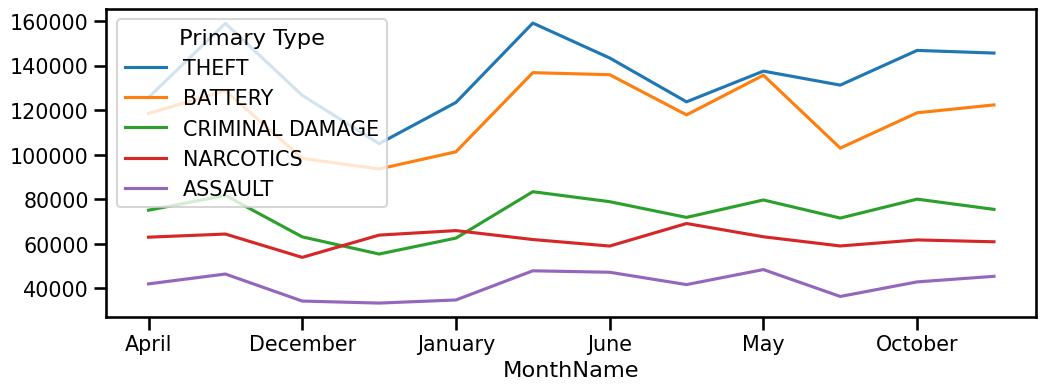

In [ ]:
top_crimes = unstacked[crimes]
top_crimes.plot()

looks like Narcotics doesn't behave like the other crimes

## Topic 1
- Topic 1) Comparing Police Districts
-- Which district had the most crimes in 2022?
-- Which had the least?


In [ ]:
crimes_22 = df_conv.loc['2022']
crimes_22

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2022-01-01 13:00:00,12582293,THEFT,$500 AND UNDER,RESTAURANT,False,False,121,1.0,42.0,41.881884,-87.640060
2022-01-01 13:00:00,12607313,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,BANK,False,False,811,8.0,23.0,41.787923,-87.769446
2022-01-01 01:00:00,12585671,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,531,5.0,9.0,41.687443,-87.604120
2022-01-01 01:00:00,12592889,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,False,412,4.0,8.0,41.734353,-87.585147
2022-01-01 01:00:00,12584977,THEFT,$500 AND UNDER,OTHER (SPECIFY),False,False,1811,18.0,2.0,41.910818,-87.654560
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 12:50:00,12938029,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,24.0,41.855911,-87.719966
2022-12-31 12:50:00,12937822,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,6.0,41.766546,-87.645669
2022-12-31 00:52:00,12937583,BATTERY,SIMPLE,BARBERSHOP,False,False,1135,11.0,28.0,41.868829,-87.686098


In [ ]:
dist_crimes = crimes_22['District'].value_counts()
dist_crimes

District
8.0     14805
6.0     14694
12.0    14341
4.0     13931
11.0    13457
1.0     13044
18.0    12429
19.0    12243
25.0    11951
3.0     11937
2.0     11793
9.0     10376
7.0     10319
10.0     9961
5.0      9773
16.0     9226
24.0     8469
15.0     8308
14.0     8158
22.0     7671
17.0     6997
20.0     4960
31.0       15
Name: count, dtype: int64

<ipython-input-44-b4ba342ee85d>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation =90);


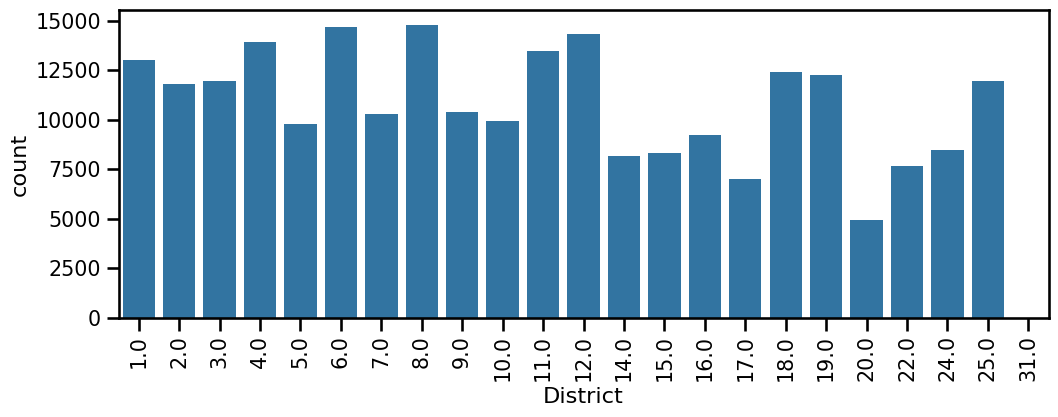

In [ ]:
ax = sns.barplot(data = dist_crimes)
ax.set_xticklabels(ax.get_xticklabels(), rotation =90);

In [ ]:
dist_crimes.max()

14805

In [ ]:
dist_crimes.min()

15

District 8 had the most crimes in 2022 while district 31 had the least

# PART 2

## Comparing and predicting Theft and Battary for 6 months

In [ ]:
#imports
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
!pip install pmdarima
import statsmodels.tsa.api as tsa
from pmdarima.model_selection import train_test_split
from pmdarima.arima.utils import ndiffs, nsdiffs

# Set wide fig size for plots
plt.rcParams['figure.figsize']=(12,3)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.8 MB/s eta 0:00:00


## CUSTOM FUNCTIONS

In [ ]:
### NEW FUNCTION FOR COMBINED ACF/PACF WITH ANNOTATIONS
def plot_acf_pacf(ts, nlags=40, figsize=(10, 5),
                  annotate_sig=False, alpha=.05,
                 acf_kws={}, pacf_kws={},
                  annotate_seas=False, m = None,
                 seas_color='black'):

    fig, axes = plt.subplots(nrows=2, figsize=figsize)

    # Sig lags line style
    sig_vline_kwargs = dict( ls=':', lw=1, zorder=0, color='red')
    # ACF
    tsa.graphics.plot_acf(ts, ax=axes[0], lags=nlags, **acf_kws)

    ## Annotating sig acf lags
    if annotate_sig == True:
        sig_acf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='ACF')
        for lag in sig_acf_lags:
            axes[0].axvline(lag,label='sig', **sig_vline_kwargs )
    # PACF
    tsa.graphics.plot_pacf(ts,ax=axes[1], lags=nlags, **pacf_kws)

    ## Annotating sig pacf lags
    if annotate_sig == True:
        ## ANNOTATING SIG LAGS
        sig_pacf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='PACF')
        for lag in sig_pacf_lags:
            axes[1].axvline(lag, label='sig', **sig_vline_kwargs)

    ### ANNOTATE SEASONS
    if annotate_seas == True:
        # Ensure m was defined
        if m is None:
            raise Exception("Must define value of m if annotate_seas=True.")
        ## Calculate number of complete seasons to annotate
        n_seasons = nlags//m
        # Seasonal Lines style
        seas_vline_kwargs = dict( ls='--',lw=1, alpha=.7, color=seas_color, zorder=-1)

        ## for each season, add a line
        for i in range(1, n_seasons+1):
            axes[0].axvline(m*i, **seas_vline_kwargs, label="season")
            axes[1].axvline(m*i, **seas_vline_kwargs, label="season")
    fig.tight_layout()

    return fig

In [ ]:
import  statsmodels.tsa.api as tsa
def get_adfuller_results(ts, alpha=.05, label='adfuller', **kwargs): #kwargs for adfuller()
    # Saving each output
    (test_stat, pval, nlags, nobs, crit_vals_d,
    icbest ) = tsa.adfuller(ts, **kwargs)
    # Converting output to a dictionary with the interpretation of p
    adfuller_results = {'Test Statistic': test_stat,
                        "# of Lags Used":nlags,
                       '# of Observations':nobs,
                        'p-value': round(pval,6),
                        'alpha': alpha,
                       'sig/stationary?': pval < alpha}
    return pd.DataFrame(adfuller_results, index =[label])

In [ ]:
def plot_forecast(ts_train, ts_test, forecast_df, n_train_lags=None,
                  figsize=(10,4), title='Comparing Forecast vs. True Data'):
    ### PLot training data, and forecast (with upper/,lower ci)
    fig, ax = plt.subplots(figsize=figsize)
    # setting the number of train lags to plot if not specified
    if n_train_lags==None:
        n_train_lags = len(ts_train)

    # Plotting Training  and test data
    ts_train.iloc[-n_train_lags:].plot(ax=ax, label="train")
    ts_test.plot(label="test", ax=ax)
    # Plot forecast
    forecast_df['mean'].plot(ax=ax, color='green', label="forecast")
    # Add the shaded confidence interval
    ax.fill_between(forecast_df.index,
                    forecast_df['mean_ci_lower'],
                   forecast_df['mean_ci_upper'],
                   color='green', alpha=0.3,  lw=2)
    # set the title and add legend
    ax.set_title(title)
    ax.legend();

    return fig, ax

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

def regression_metrics_ts(ts_true, ts_pred, label="", verbose=True, output_dict=False,):
    # Get metrics
    mae = mean_absolute_error(ts_true, ts_pred)
    mse = mean_squared_error(ts_true, ts_pred)
    rmse = mean_squared_error(ts_true, ts_pred, squared=False)
    r_squared = r2_score(ts_true, ts_pred)
    mae_perc = mean_absolute_percentage_error(ts_true, ts_pred) * 100

    if verbose == True:
        # Print Result with label
        header = "---" * 20
        print(header, f"Regression Metrics: {label}", header, sep="\n")
        print(f"- MAE = {mae:,.3f}")
        print(f"- MSE = {mse:,.3f}")
        print(f"- RMSE = {rmse:,.3f}")
        print(f"- R^2 = {r_squared:,.3f}")
        print(f"- MAPE = {mae_perc:,.2f}%")

    if output_dict == True:
        metrics = {
            "Label": label,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "R^2": r_squared,
            "MAPE(%)": mae_perc,
        }
        return metrics

In [ ]:
#LOADING THE DATA
crimes_ts.head()

,THEFT,BATTERY,CRIMINAL DAMAGE,NARCOTICS,ASSAULT
Date,,,,,
2001-01-01,412,296,233,97,70
2001-01-02,221,143,118,175,66
2001-01-03,226,165,136,133,79
2001-01-04,243,173,133,142,57
2001-01-05,265,178,142,185,68


In [ ]:
#looking at index
crimes_ts.index

DatetimeIndex(['2001-01-01', '2001-01-02', '2001-01-03', '2001-01-04',
               '2001-01-05', '2001-01-06', '2001-01-07', '2001-01-08',
               '2001-01-09', '2001-01-10',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', name='Date', length=8035, freq='D')

We need to resample and change the frequency to monthly by using sum

In [ ]:
#resampling
crimes_ts = crimes_ts.resample('M').sum()
crimes_ts.head()

,THEFT,BATTERY,CRIMINAL DAMAGE,NARCOTICS,ASSAULT
Date,,,,,
2001-01-31,7867,6527,3966,4714,2123
2001-02-28,6669,6042,3665,4369,2029
2001-03-31,7766,7662,4617,4862,2824
2001-04-30,7702,8328,4922,4044,2746
2001-05-31,8420,8887,4757,4038,2903


# THEFT

In [ ]:
#defining timeseries of theft
theft_ts = crimes_ts['THEFT']
theft_ts.head()

Date
2001-01-31    7867
2001-02-28    6669
2001-03-31    7766
2001-04-30    7702
2001-05-31    8420
Freq: M, Name: THEFT, dtype: int64

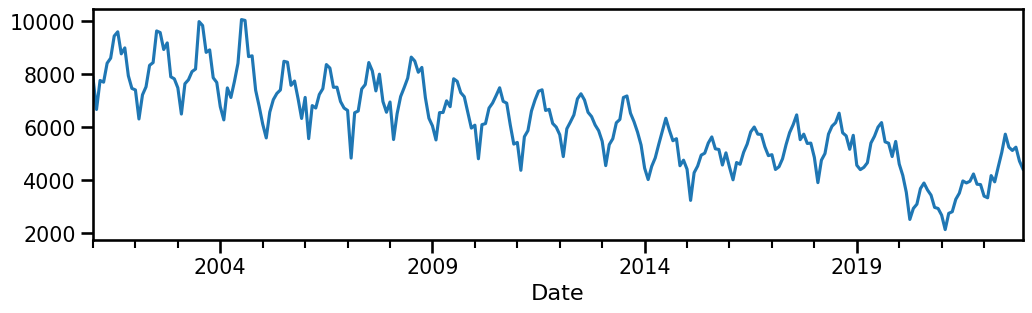

In [ ]:
#plotting the time series
theft_ts.plot();

In [ ]:
#checking for null values
theft_ts.isna().sum()

0

No null values

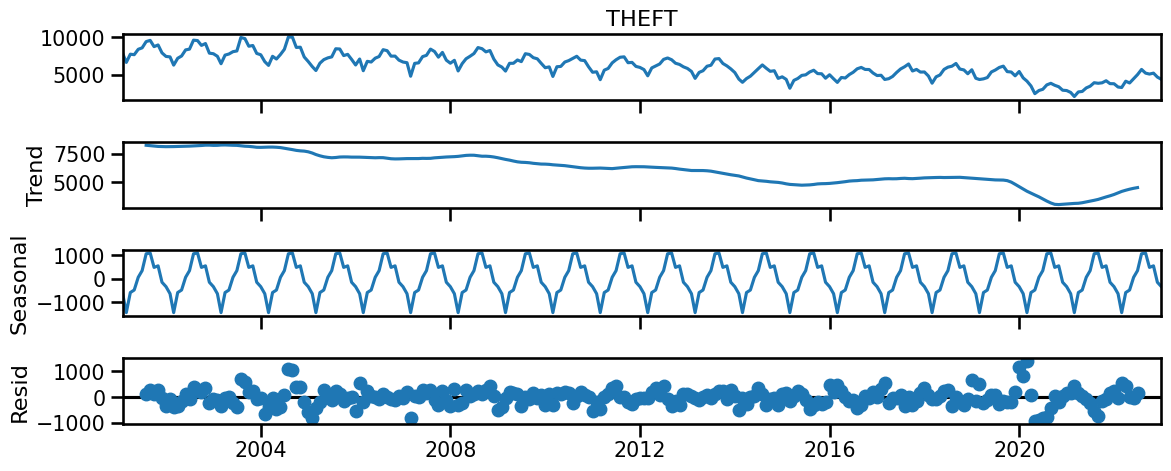

In [ ]:
# Apply seasonal decomposition
decomp = tsa.seasonal_decompose(theft_ts)
fig = decomp.plot()
fig.set_size_inches(12,5)
fig.tight_layout()

In [ ]:
# How big is the seasonal component
seasonal_delta = decomp.seasonal.max() - decomp.seasonal.min()

# How big is the seasonal component relative to the time series?
print(f"The seasonal component is {seasonal_delta: .2f} which is ~{seasonal_delta/(theft_ts.max()-theft_ts.min()) * 100 :.2f}% of the variation in time series.")

The seasonal component is  2549.99 which is ~32.08% of the variation in time series.


The seasonal component seems significant at 32.08%. I will go with a SARIMA model

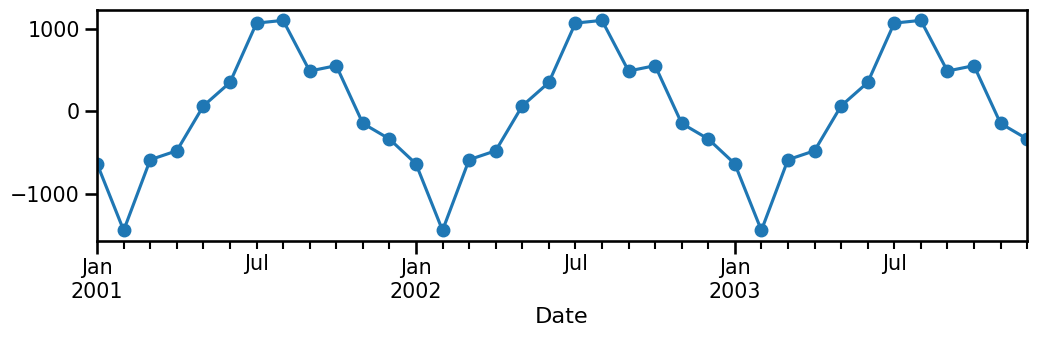

In [ ]:
# Narrow down the date range of the plot to determing the period of the seasoanl component
seasonal = decomp.seasonal
ax = seasonal.loc['2001': '2003'].plot(marker = 'o')

`m` is 12 months

In [ ]:
#Determining if nonseasonal for seasonal differencing is needed
# determine d
d = ndiffs(theft_ts)
print (f'd = {d}')
# determine D
D = nsdiffs(theft_ts, m = 12)
print (f'D = {D}')

d = 1
D = 0


Only non seasonal differencing is needed

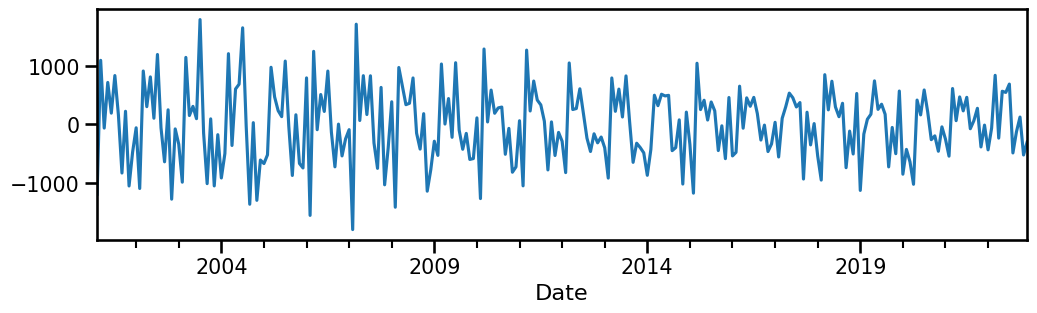

In [ ]:
# apply differencing
ts_diff = theft_ts.diff().dropna()
ts_diff.plot();

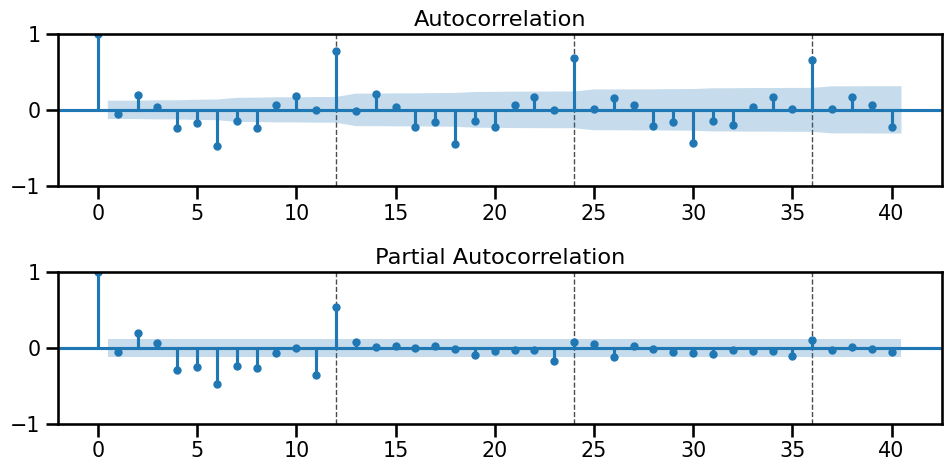

In [ ]:
# now look at the acf/pacf of the stationary data
plot_acf_pacf(ts_diff, annotate_seas = True, m = 12);

We shall start with SARIMA(1,1,1)(1,0,0)[12]

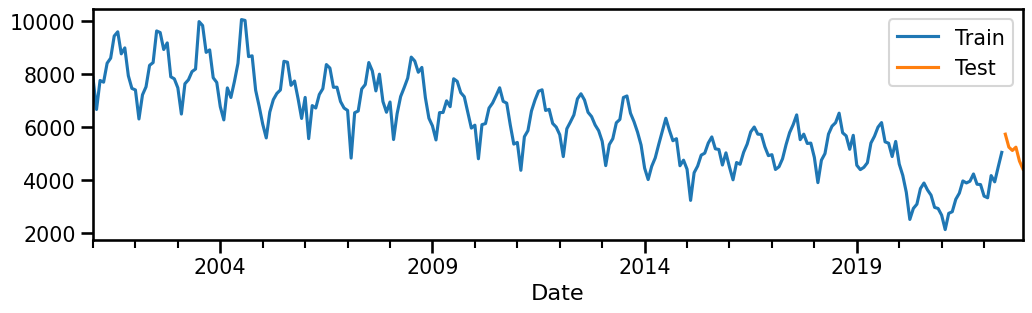

In [ ]:
# tts
train, test = train_test_split(theft_ts, test_size=6)
ax = train.plot(label='Train')
test.plot(ax=ax, label='Test')
ax.legend();

In [ ]:
# Orders for non seasonal components
p = 1  # nonseasonal AR
d = 1  # nonseasonal differencing
q = 1  # nonseasonal MA

# Orders for seasonal components
P = 1  # Seasonal AR
D = 0  # Seasonal differencing
Q = 0  # Seasonal MA
m = 12 # Seasonal period

sarima = tsa.ARIMA(train, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()

# Obtain summary
sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             THEFT   No. Observations:                  258
Model:             ARIMA(1, 1, 1)x(1, 0, [], 12)   Log Likelihood               -1897.686
Date:                           Tue, 14 May 2024   AIC                           3803.371
Time:                                   06:00:13   BIC                           3817.567
Sample:                               01-31-2001   HQIC                          3809.080
                                    - 06-30-2022                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9640      0.171     -5.636      0.000      -1.299      -0.629
ma.L1          0.9701      0.155      6.267      0.000       0.667       1.274
ar.S.L12       0.7794      0.029     26.848      0.000       0.722       0.836
sigma2      1.376e+05   1.04e+04     13.255      0.000    1.17e+05    1.58e+05
===================================================================================
Ljung-Box (L1) (Q):                   9.32   Jarque-Bera (JB):                 4.44
Prob(Q):                              0.00   Prob(JB):                         0.11
Heteroskedasticity (H):               0.72   Skew:                            -0.07
Prob(H) (two-sided):                  0.13   Kurtosis:                         3.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

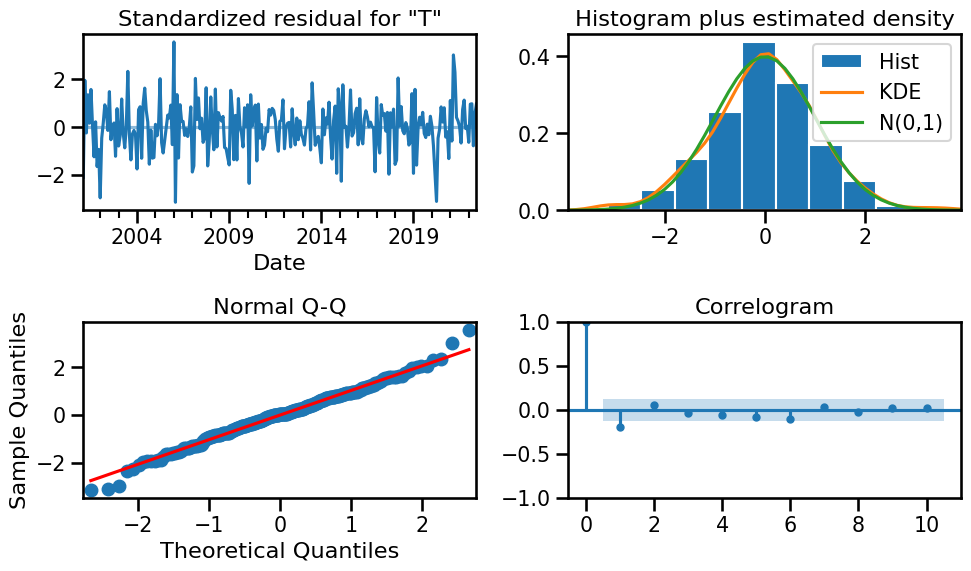

In [ ]:
# Obtain diagnostic plots
fig = sarima.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

there's a value of concern at lag 1

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 424.992
- MSE = 243,329.318
- RMSE = 493.284
- R^2 = -0.379
- MAPE = 8.77%


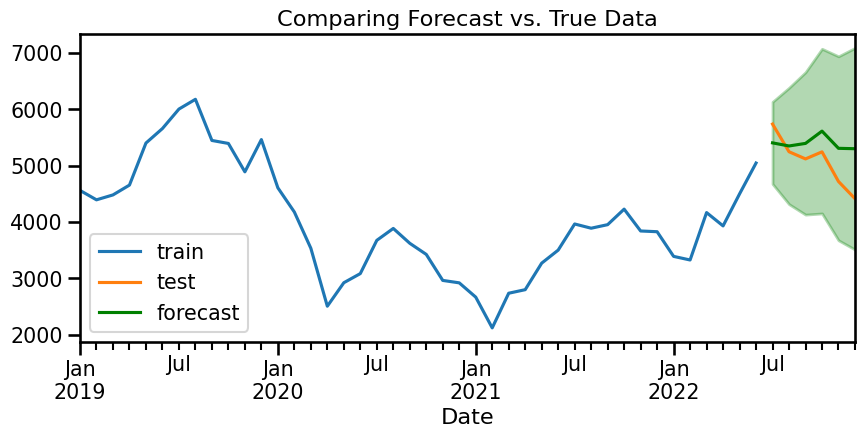

In [ ]:
# Obtain forecast as a dataframe with confidence intervals
forecast_df = sarima.get_forecast(steps=len(test)).summary_frame()
# Call the custom function to plot the forecasts with confidence intervals and true values
plot_forecast(train.loc['2019':], test, forecast_df);
# Obtain metrics
regression_metrics_ts(test, forecast_df['mean'])

In [ ]:
import pmdarima as pm

# Default auto_arima will select model based on AIC score
auto_model = pm.auto_arima(
    train,
    seasonal=True,
    m=12,
)

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(1,1,0)(2,0,2)[12] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/mlemodel.py", line 703, in fit
    mlefit = super().fit(start_params, method=method,
  File "/usr/local/lib/python3.10/dist-packa

In [ ]:
# checking orders
print(auto_model.order)
print(auto_model.seasonal_order)

(1, 1, 0)
(1, 0, 2, 12)


our best model is SARIMA(1, 1, 0)
(1, 0, 2, 12)

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 211.160
- MSE = 72,805.923
- RMSE = 269.826
- R^2 = 0.587
- MAPE = 4.27%


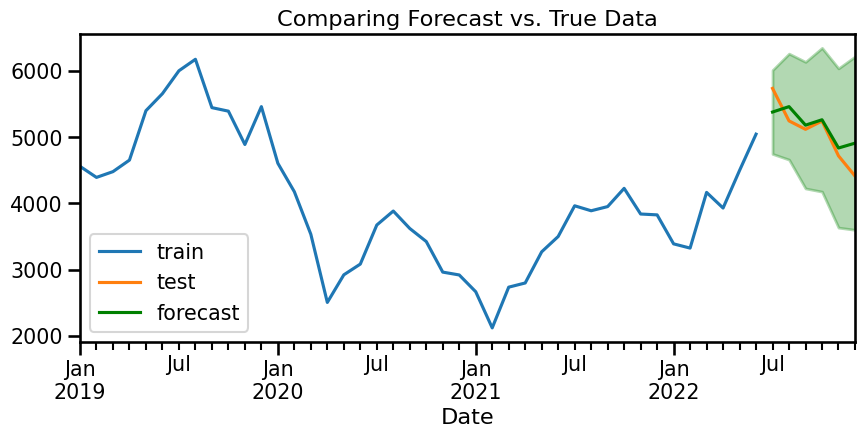

In [ ]:
# Use auto_arima parameters to fit an ARIMA
auto_model = tsa.ARIMA(
    train, order=auto_model.order, seasonal_order=auto_model.seasonal_order
).fit()


# Obtain forecast as a dataframe with confidence intervals
forecast_df = auto_model.get_forecast(steps=len(test)).summary_frame()
# Call the custom function to plot the forecasts with confidence intervals and true values
plot_forecast(train.loc['2019':], test, forecast_df);
# Obtain metrics
regression_metrics_ts(test, forecast_df['mean'])

This is a better model with a lower MAPE of 4.27%

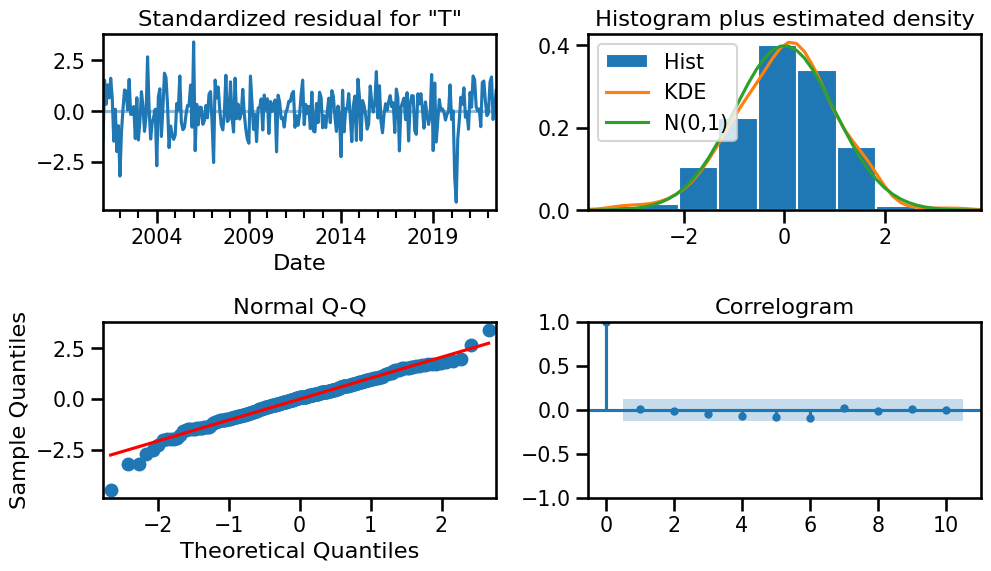

In [ ]:
# Obtain diagnostic plots
fig = auto_model.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

Final model SARIMA(1,1,1)(0,0,1)[12]

## Getting future forecast

In [ ]:
# These are the parameters of our final model
# Orders for non seasonal components
p = 1  # nonseasonal AR
d = 1  # nonseasonal differencing
q = 1  # nonseasonal MA

# Orders for seasonal components
P = 0  # Seasonal AR
D = 0  # Seasonal differencing
Q = 1  # Seasonal MA
m = 12 # Seasonal period

final_model = tsa.ARIMA(theft_ts, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()

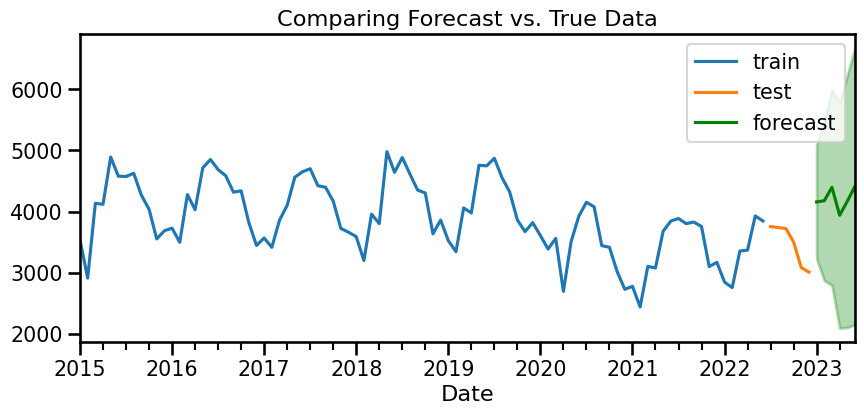

In [ ]:
# Obtain future forecasts beyond test data
forecast_df  = final_model.get_forecast(len(test)).summary_frame()
plot_forecast(train.loc['2015':],test,forecast_df);

In [ ]:
#looking at the forecast df
forecast_df

THEFT,mean,mean_se,mean_ci_lower,mean_ci_upper
2023-01-31,4157.670970,472.944096,3230.717575,5084.624365
2023-02-28,4177.835810,666.268512,2871.973523,5483.698097
2023-03-31,4396.364824,817.055144,2794.966169,5997.763478
2023-04-30,3940.120654,942.245904,2093.352617,5786.888691
2023-05-31,4169.085338,1054.268490,2102.757068,6235.413609
2023-06-30,4414.068460,1154.010764,2152.248924,6675.887996


## Getting predicted net change

In [ ]:
#starting value
starting_value = forecast_df['mean'].iloc[0]
starting_value

4157.670969965485

In [ ]:
#final value
final_value = forecast_df['mean'].iloc[-1]
final_value

4414.068460290604

In [ ]:
#getting change
change = final_value - starting_value
change

256.3974903251192

- The data indicates that the thefts will increase by 256 over the forecast period

In [ ]:
#%age change
perc_change = (change / starting_value) * 100
perc_change

6.166853802941691

This is about 6% change

# BATTERY

In [ ]:
#defining timeseries of theft
batt_ts = crimes_ts['BATTERY']
batt_ts.head()

Date
2001-01-31    6527
2001-02-28    6042
2001-03-31    7662
2001-04-30    8328
2001-05-31    8887
Freq: M, Name: BATTERY, dtype: int64

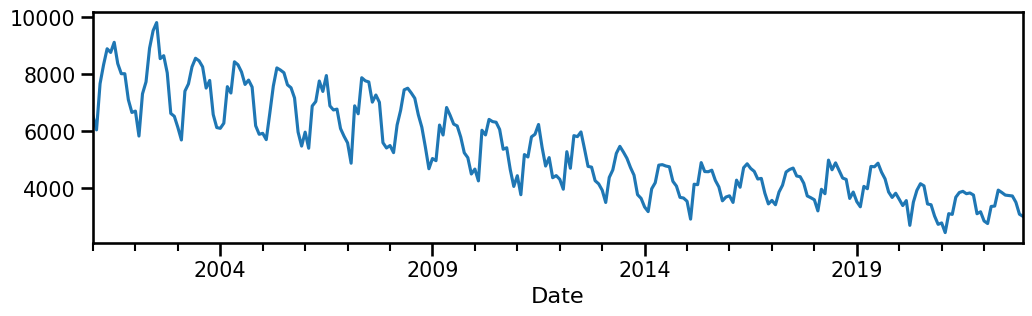

In [ ]:
#plotting the time series
batt_ts.plot();

In [ ]:
#checking for null values
batt_ts.isna().sum()

0

- No nulls

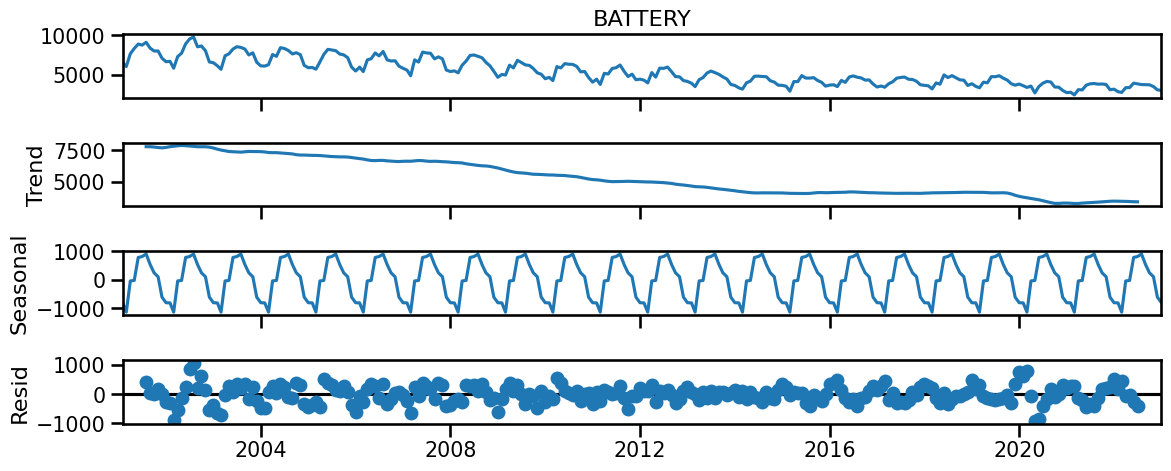

In [ ]:
# Apply seasonal decomposition
decomp = tsa.seasonal_decompose(batt_ts)
fig = decomp.plot()
fig.set_size_inches(12,5)
fig.tight_layout()

In [ ]:
# How big is the seasonal component
seasonal_delta = decomp.seasonal.max() - decomp.seasonal.min()

# How big is the seasonal component relative to the time series?
print(f"The seasonal component is {seasonal_delta: .2f} which is ~{seasonal_delta/(batt_ts.max()-batt_ts.min()) * 100 :.2f}% of the variation in time series.")

The seasonal component is  2040.13 which is ~27.70% of the variation in time series.


27.7% is significant. we shall consider the seasonal component

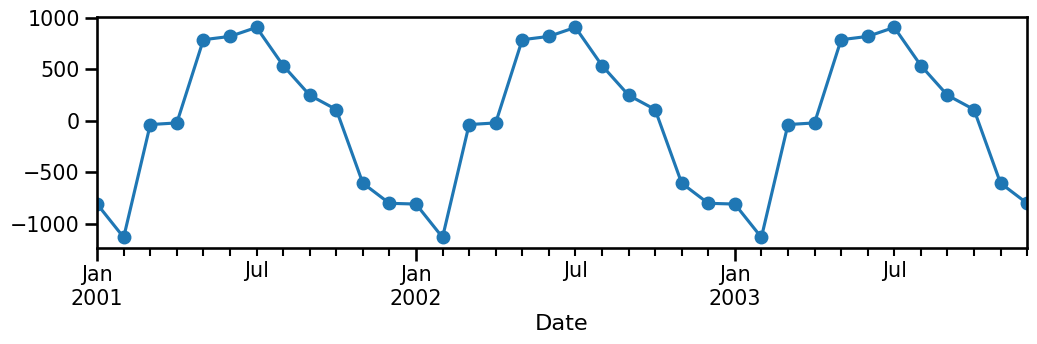

In [ ]:
# Narrow down the date range of the plot to determing the period of the seasoanl component
seasonal = decomp.seasonal
ax = seasonal.loc['2001': '2003'].plot(marker = 'o')

`m` is 12 aswell

In [ ]:
#Determining if nonseasonal for seasonal differencing is needed
# determine d
d = ndiffs(batt_ts)
print (f'd = {d}')
# determine D
D = nsdiffs(batt_ts, m = 12)
print (f'D = {D}')

d = 1
D = 0


No seasonal differencing needed.

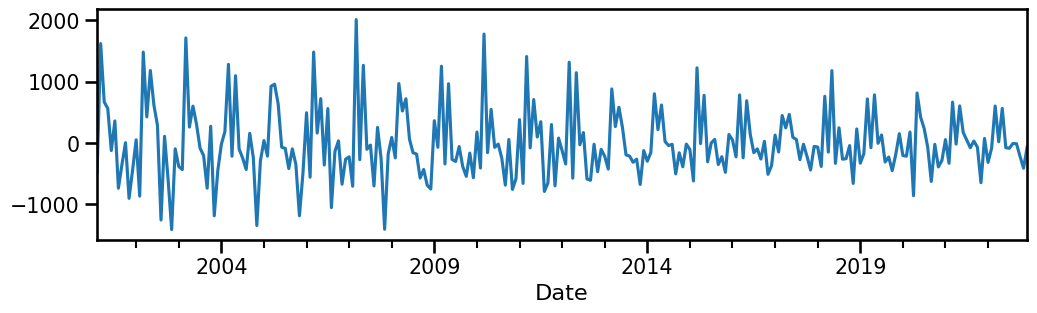

In [ ]:
# apply differencing
ts_diff = batt_ts.diff().dropna()
ts_diff.plot();

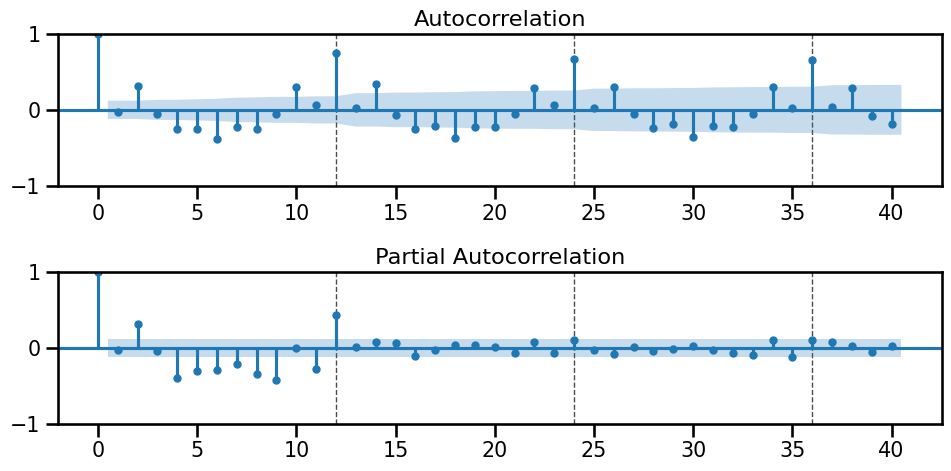

In [ ]:
# now look at the acf/pacf of the stationary data
plot_acf_pacf(ts_diff, annotate_seas = True, m = 12);

SARIMA(1,1,1)(0,0,1)[12]

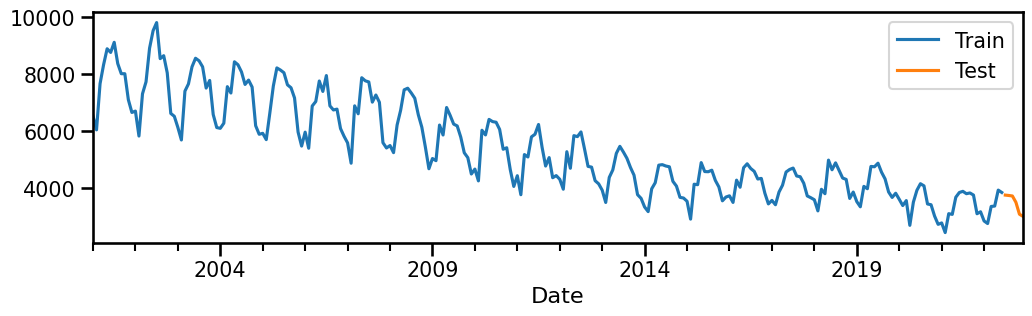

In [ ]:
# tts
train, test = train_test_split(batt_ts, test_size=6)
ax = train.plot(label='Train')
test.plot(ax=ax, label='Test')
ax.legend();

In [ ]:
# Orders for non seasonal components
p = 1  # nonseasonal AR
d = 1  # nonseasonal differencing
q = 1  # nonseasonal MA

# Orders for seasonal components
P = 0  # Seasonal AR
D = 0  # Seasonal differencing
Q = 1  # Seasonal MA
m = 12 # Seasonal period

sarima = tsa.ARIMA(train, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()

# Obtain summary
sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                          BATTERY   No. Observations:                  258
Model:             ARIMA(1, 1, 1)x(0, 0, 1, 12)   Log Likelihood               -1929.510
Date:                          Tue, 14 May 2024   AIC                           3867.020
Time:                                  07:00:21   BIC                           3881.217
Sample:                              01-31-2001   HQIC                          3872.729
                                   - 06-30-2022                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5345      0.273     -1.959      0.050      -1.069       0.000
ma.L1          0.3678      0.317      1.161      0.246      -0.253       0.989
ma.S.L12       0.6326      0.054     11.616      0.000       0.526       0.739
sigma2      1.891e+05    1.5e+04     12.617      0.000     1.6e+05    2.18e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.48   Jarque-Bera (JB):                 8.90
Prob(Q):                              0.49   Prob(JB):                         0.01
Heteroskedasticity (H):               0.33   Skew:                             0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

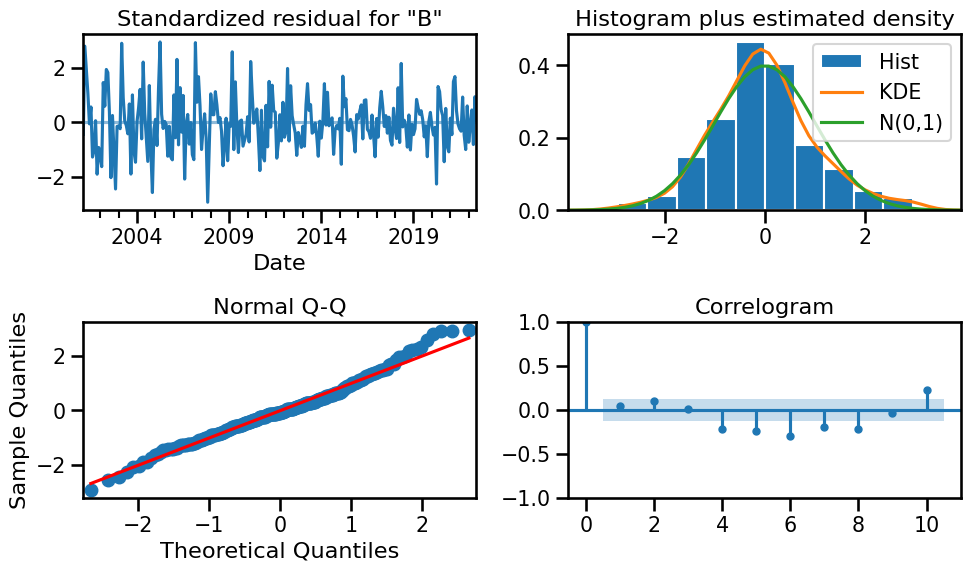

In [ ]:
# Obtain diagnostic plots
fig = sarima.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

many values of concern at lags 4 to 8 on the correlogram

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 332.218
- MSE = 177,057.353
- RMSE = 420.782
- R^2 = -0.829
- MAPE = 10.32%


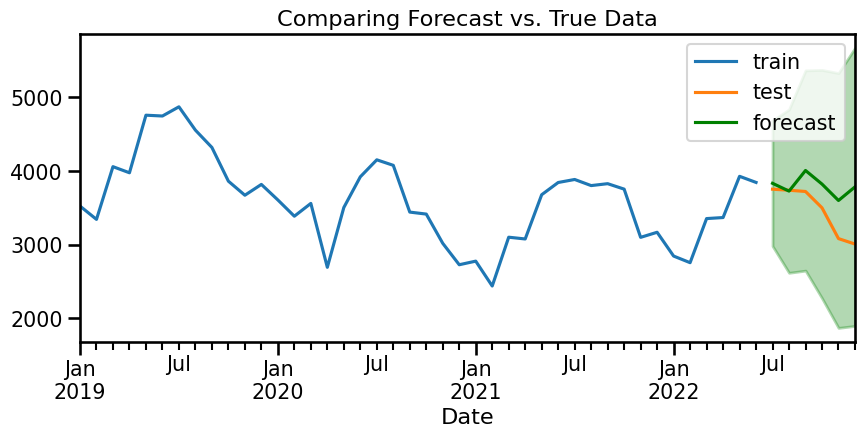

In [ ]:
# Obtain forecast as a dataframe with confidence intervals
forecast_df = sarima.get_forecast(steps=len(test)).summary_frame()
# Call the custom function to plot the forecasts with confidence intervals and true values
plot_forecast(train.loc['2019':], test, forecast_df);
# Obtain metrics
regression_metrics_ts(test, forecast_df['mean'])

In [ ]:
import pmdarima as pm

# Default auto_arima will select model based on AIC score
auto_model2 = pm.auto_arima(
    train,
    seasonal=True,
    m=12, error_action='ignore'
)

In [ ]:
# checking orders
print(auto_model2.order)
print(auto_model2.seasonal_order)

(2, 1, 0)
(1, 0, 1, 12)


SARIMA(2, 1, 0)
(1, 0, 1, 12)

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 95.190
- MSE = 17,440.843
- RMSE = 132.064
- R^2 = 0.820
- MAPE = 2.61%


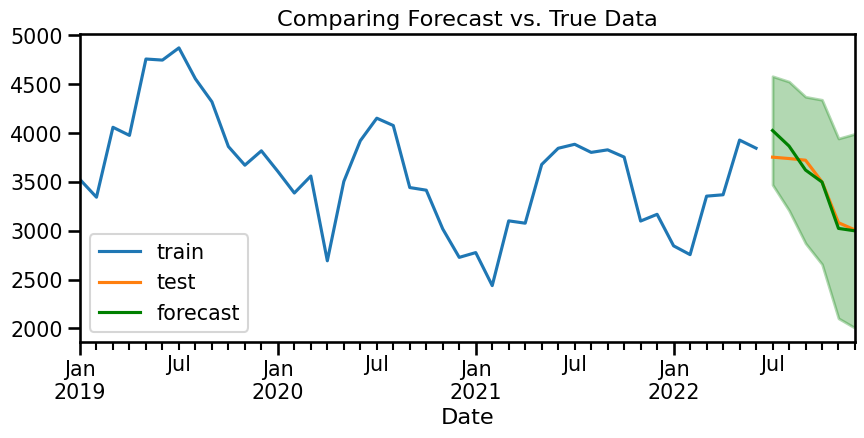

In [ ]:
# Use auto_arima parameters to fit an ARIMA
auto_model2 = tsa.ARIMA(
    train, order=auto_model2.order, seasonal_order=auto_model2.seasonal_order
).fit()


# Obtain forecast as a dataframe with confidence intervals
forecast_df = auto_model2.get_forecast(steps=len(test)).summary_frame()
# Call the custom function to plot the forecasts with confidence intervals and true values
plot_forecast(train.loc['2019':], test, forecast_df);
# Obtain metrics
regression_metrics_ts(test, forecast_df['mean'])

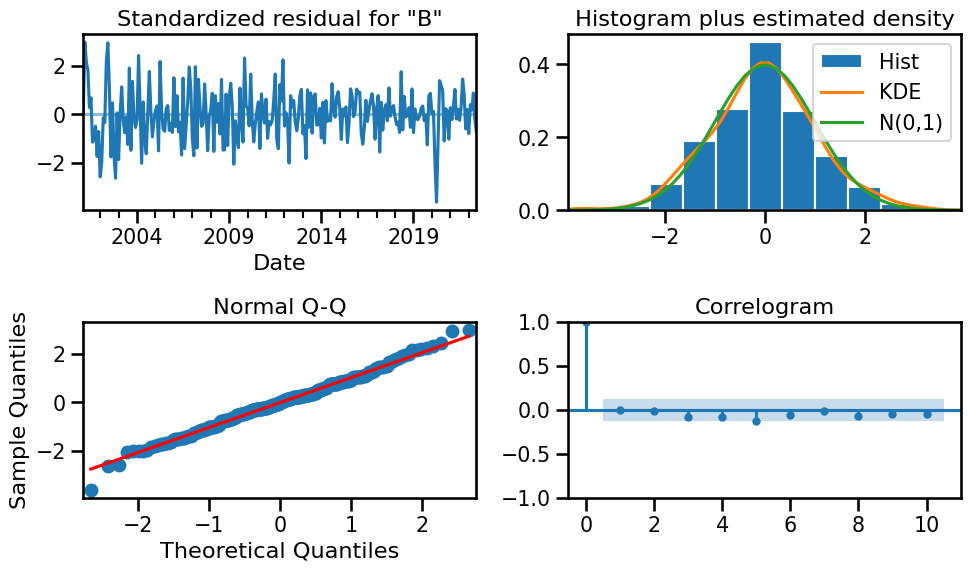

In [ ]:
# Obtain diagnostic plots
fig = auto_model2.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

Final models
-  For thefts SARIMA(1,1,1)(0,0,1)[12]
- For battery SARIMA(2, 1, 0) (1, 0, 1)[12]

In [ ]:
# These are the parameters of our final model
# Orders for non seasonal components
p = 2  # nonseasonal AR
d = 1  # nonseasonal differencing
q = 0  # nonseasonal MA

# Orders for seasonal components
P = 1  # Seasonal AR
D = 0  # Seasonal differencing
Q = 1  # Seasonal MA
m = 12 # Seasonal period

final_model = tsa.ARIMA(batt_ts, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()

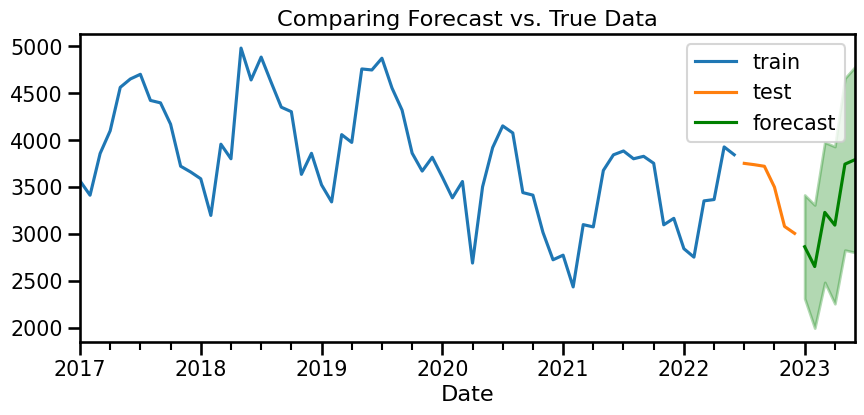

In [ ]:
# Obtain future forecasts beyond test data
forecast_df  = final_model.get_forecast(len(test)).summary_frame()
plot_forecast(train.loc['2017':],test,forecast_df);

In [ ]:
#starting value
starting_value = forecast_df['mean'].iloc[0]
starting_value

2866.592012512591

In [ ]:
#final value
final_value = forecast_df['mean'].iloc[-1]
final_value

3793.4853203736216

In [ ]:
#change
change = final_value - starting_value
change

926.8933078610307

The Battery cases will increase by 927 approximately

In [ ]:
#percentage change
perc_change = (change / starting_value) * 100
perc_change

32.334329538879906

This represents a 32% change in this crime

## COMPARISON OF THE TWO CRIMES

-  Of the two crimes Battery is forecast to have the highest monthly count of crimes at the end of the forecast period at 4414
- Of the two crimes Battery is forecast to have the highest net change of 926
- Of the two crimes Battery has the highest percentage change of 32%


# RECOMMENDATIONS

1. I would recommend that our stakeholders concentrate on Battery over thefts.